<a href="https://colab.research.google.com/github/daffakf/pda/blob/main/Daffa_Ksatria_Firdaus_065119168_uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install psycopg2

In [ ]:
# import library
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import statistics as st

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
# Dataset diambil dari github
df = pd.read_csv("https://raw.githubusercontent.com/daffakf/pda/main/assets/dataset/teori-uts/transaksi_pelanggan.csv")

In [ ]:
df

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1,TANJUNGPINANG TIMUR,Ya,24,27,76315780395,23.0,Gaji,4,3,5286900,TNI / POLRI,NaN
1,2,MAHAMERU,Tidak,10,22,44579620,9.0,Gaji,4,29,435200,Pelajar / Mahasiswa,NaN
2,3,BRASTAGI,Ya,16,47,65664162044,17.0,Hasil Usaha,15,25,97689000,Petani,NaN
3,4,TANJUNG MORAWA,Tidak,25,44,31830267,NaN,Hasil Usaha,6,17,7915200,Ibu Rumah Tangga,2.0
4,5,SUZUYA PLAZA,Tidak,8,39,35495225,16.0,Gaji,29,18,45360900,Profesional,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,PASAR DURIAN,Ya,16,27,37344603991,28.0,Hasil Usaha,1,296,39800,Pelajar / Mahasiswa,NaN
146,147,SIMPANG EMPAT,Tidak,2,38,84838726,NaN,Gaji,3,261,6513000,PNS,NaN
147,148,TIBAN INDAH,Ya,7,49,37141313402,2.0,Hasil Usaha,1,326,333600,Lainnya,15.0
148,149,TAPI BANDAR,Ya,1,33,68816051193,18.0,Gaji,15,305,14540200,Ibu Rumah Tangga,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_customer                150 non-null    int64  
 1   cabang                     150 non-null    object 
 2   mempunyai_usaha            150 non-null    object 
 3   lama_menjadi_customer      150 non-null    int64  
 4   umur                       150 non-null    int64  
 5   pendapatan                 150 non-null    int64  
 6   lama_bekerja               124 non-null    float64
 7   sumber_dana                135 non-null    object 
 8   jumlah_transaksi           150 non-null    int64  
 9   n_hari_terakhir_transaksi  150 non-null    int64  
 10  nilai_transaksi            150 non-null    int64  
 11  profesi                    150 non-null    object 
 12  jumlah_tanggungan          45 non-null     float64
dtypes: float64(2), int64(7), object(4)
memory usage: 1

In [ ]:
df.keys()

Index(['id_customer', 'cabang', 'mempunyai_usaha', 'lama_menjadi_customer',
       'umur', 'pendapatan', 'lama_bekerja', 'sumber_dana', 'jumlah_transaksi',
       'n_hari_terakhir_transaksi', 'nilai_transaksi', 'profesi',
       'jumlah_tanggungan'],
      dtype='object')

# **A. Menjelaskan Tipe Data**

**Data nominal** yang juga dikenal sebagai skala nominal adalah jenis data yang digunakan untuk melabeli variabel penelitian tanpa memberikan nilai kuantitatif apa pun. Ini adalah bentuk skala ukuran yang paling sederhana. Berbeda dengan data ordinal, data nominal tidak dapat diurutkan dan tidak dapat diukur.
- Tipe data nominal, yaitu kolom `cabang`, `mempunyai_usaha`, `sumber_dana`, dan `profesi` 

**Data ordinal** adalah jenis statistik data kuantitatif di mana kolom ada dalam kategori terurut yang terjadi secara alami. Dalam statistik, sekelompok bilangan ordinal menunjukkan data ordinal dan sekelompok data ordinal direpresentasikan dengan menggunakan skala ordinal.
- Tipe data Ordinal, yaitu kolom `lama_menjadi_customer`, `pendapatan`, `umur`, dan `jumlah_transaksi`.

**Data interval** yang juga disebut integer dianggap sebagai tipe data yang diukur dalam skala data, di mana setiap titik ditempatkan pada jarak yang sama satu sama lain.
- Tipe data interval, yaitu kolom `lama_menjadi_customer`, `umur`, `pendapatan`, `lama_bekerja`, `jumlah_transaksi`, `nilai_transaksi`, `jumlah_tanggungan`.

**Data rasio** adalah data yang bersekala rasio hampir sama dengan data interval, yakni keduanya memiliki sifat menunjukan klasifikasi dan kedudukan subjek dalam suatu kelompok, serta sifat persamaan jarak. Data rasio berbeda dari data interval karena pertama data rasio memiliki nilai mutlak nol. Data pengukuran yang memiliki nol mutlak sehingga dapat dilakukan operasi perkalian dan pembagian. Misalnya berat badan, tinggi badan, pendapatan dan lain sebagainya.
- Tipe data ratio, yaitu kolom `umur`, `pendapatan`, `jumlah_tanggungan`, `jumlah_transaksi`, `lama_bekerja`.

# **B. Menjelaskan central tendencies dari setiap variable**

*hasil/output 'nan' dapat disebabkan oleh adanya nilai NULL dalam dataset.

- Kolom **`id_customer`**, memiliki mean : 75.5 dan median : 75.5.

- Kolom **`cabang`**, tidak memiliki mean, modus, dan median.
- Kolom **`mempunyai_usaha`**, hanya memiliki modus : 'Ya'.
- Kolom **`lama_menjadi_customer`**, memiliki mean : 13.6, modus : (16, 18, & 22), dan median : 14.5.
- Kolom **`umur`**, memiliki mean : 37.83, modus : 33, dan median : 35.0.
- Kolom **`pendapatan`**, memiliki mean : 25160998897.27 dan median : 3757912475
- Kolom **`lama_bekerja`**, memiliki mean : 15.088, modus : (2.0 & 4.0), dan median : 16.0
- Kolom **`sumber_dana`**, hanya memiliki modus : 'gaji'
- Kolom **`jumlah_transaksi`**, memiliki mean : 8.174, modus : 1, dan median : 4.5
- Kolom **`n_hari_terakhir_transaksi`**, memiliki mean : 181.393, modus : 277, dan median : 249.0
- Kolom **`nilai_transaksi`**, memiliki mean : 15079608, modus : (145800 & 285600) dan median :  5395750.0
- Kolom **`profesi`**, hanya memiliki modus : Ibu Rumah Tangga
- Kolom **`jumlah_tanggungan`**, mean : 14.2, modus : 1.0, dan median : 7.0

In [ ]:
# Variabel id_customer

print("mean :", st.mean(df['id_customer']))
#print("modus :", st.mode(df['id_customer'])) # Tidak memiliki modus karena semua setiap baris memiliki 'nilai' yang unik
print("median :", st.median(df['id_customer']))

mean : 75.5
median : 75.5


In [ ]:
# Variabel mempunyai_usaha

#print("mean :", st.mean(df['mempunyai_usaha'])) # Tipe data bukan angka/int
print("modus :", st.mode(df['mempunyai_usaha'])) # Dari dua pilihan (Ya atau Tidak) yang paling banyak muncul adalah 'Ya'
#print("median :", st.median(df['mempunyai_usaha'])) # Tipe data bukan angka/int

modus : Ya


In [ ]:
# Variabel lama_menjadi_customer

print("mean :", st.mean(df['lama_menjadi_customer']))
#print("modus :", st.mode(df['lama_menjadi_customer'])) # Memiliki modus hanya saja terdapat 3 (tiga) nilai yang equal
print("median :", st.median(df['lama_menjadi_customer']))

# Karena hasilnya 'aneh', maka coba pakai syntax lain
print ("")
print ("mean :", df['lama_menjadi_customer'].mean())
print ("modus :", df['lama_menjadi_customer'].mode())
print ("median :", df['lama_menjadi_customer'].median())

mean : 13.6
median : 14.5

mean : 13.6
modus : 0    16
1    18
2    22
dtype: int64
median : 14.5


In [ ]:
# Variabel umur

print("mean :", st.mean(df['umur']))
print("modus :", st.mode(df['umur']))
print("median :", st.median(df['umur']))

mean : 37.833333333333336
modus : 33
median : 35.0


In [ ]:
# Variabel pendapatan

print("mean :", st.mean(df['pendapatan']))
#print("modus :", st.mode(df['pendapatan'])) # Tidak memiliki modus karena terdapat 150 'nilai' yang equal
print("median :", st.median(df['pendapatan']))

# Karena hasil untuk modus tidak muncul, maka coba pakai syntax lain
print ("")
print ("mean :", df['pendapatan'].mean())
print ("modus :", df['pendapatan'].mode())
print ("median :", df['pendapatan'].median())

mean : 25160998897.266666
median : 3757912475.0

mean : 25160998897.266666
modus : 0          3083562
1          4832792
2          6121344
3          6971779
4          7227381
          ...     
145    93724704655
146    94448805221
147    97257217774
148    98952251055
149    99923955469
Length: 150, dtype: int64
median : 3757912475.0


In [ ]:
# Variabel lama_bekerja

print("mean :", st.mean(df['lama_bekerja'])) # hasil nan disebabkan adanya nilai yang kosong (NULL)
#print("modus :", st.mode(df['lama_bekerja'])) # Sebenarnya memiliki modus hanya saja terdapat 2 (dua) atau lebih nilai yang equal
print("median :", st.median(df['lama_bekerja']))

# Karena hasil untuk modus tidak muncul, maka coba pakai syntax lain
print ("")
print ("mean :", df['lama_bekerja'].mean())
print ("modus :", df['lama_bekerja'].mode())
print ("median :", df['lama_bekerja'].median())

mean : nan
median : 2.0

mean : 15.088709677419354
modus : 0    2.0
1    4.0
dtype: float64
median : 16.0


In [ ]:
# Variabel sumber_dana

#print("mean :", st.mean(df['sumber_dana'])) # Tipe data bukan angka/int
print("modus :", st.mode(df['sumber_dana']))
#print("median :", st.median(df['sumber_dana'])) # Tipe data bukan angka/int

modus : Gaji


In [ ]:
# Variabel jumlah_transaksi

print("mean :", st.mean(df['jumlah_transaksi']))
print("modus :", st.mode(df['jumlah_transaksi']))
print("median :", st.median(df['jumlah_transaksi']))

mean : 8.173333333333334
modus : 1
median : 4.5


In [ ]:
# Variabel n_hari_terakhir_transaksi

print("mean :", st.mean(df['n_hari_terakhir_transaksi']))
print("modus :", st.mode(df['n_hari_terakhir_transaksi']))
print("median :", st.median(df['n_hari_terakhir_transaksi']))

mean : 181.39333333333335
modus : 277
median : 249.0


In [ ]:
# Variabel nilai_transaksi

print("mean :", st.mean(df['nilai_transaksi']))
#print("modus :", st.mode(df['nilai_transaksi'])) # Sebenarnya memiliki modus hanya saja terdapat 2 (dua) nilai yang equal
print("median :", st.median(df['nilai_transaksi']))

# Karena hasil untuk modus tidak muncul, maka coba pakai syntax lain
print ("")
print ("mean :", df['nilai_transaksi'].mean())
print ("modus :", df['nilai_transaksi'].mode())
print ("median :", df['nilai_transaksi'].median())

mean : 15079608
median : 5395750.0

mean : 15079608.0
modus : 0    145800
1    285600
dtype: int64
median : 5395750.0


In [ ]:
# Variabel profesi

#print("mean :", st.mean(df['profesi'])) # Tipe data bukan angka/int
print("modus :", st.mode(df['profesi']))
#print("median :", st.median(df['profesi'])) # Tipe data bukan angka/int

modus : Ibu Rumah Tangga


In [ ]:
# Variabel jumlah_tanggungan

print("mean :", st.mean(df['jumlah_tanggungan'])) # hasil nan disebabkan adanya nilai yang kosong (NULL)
print("modus :", st.mode(df['jumlah_tanggungan'])) # Sebenarnya memiliki modus hanya saja terdapat 2 (dua) nilai yang equal
print("median :", st.median(df['jumlah_tanggungan'])) # hasil nan disebabkan adanya nilai yang kosong (NULL)

# Karena hasilnya 'nan', maka coba pakai syntax lain
print ("")
print ("mean :", df['jumlah_tanggungan'].mean())
print ("modus :", df['jumlah_tanggungan'].mode())
print ("median :", df['jumlah_tanggungan'].median())

mean : nan
modus : 1.0
median : nan

mean : 14.222222222222221
modus : 0    1.0
dtype: float64
median : 7.0


# **C. Handle missing values**

Terdapat beberapa variabel yang memiliki nilai NULL (kosong), yaitu `lama_bekerja`, `sumber_dana`, dan `jumlah_tanggungan`. Pada kasus ini saya lakukan penambalan data yang bernilai NULL agar dataset tidak memiliki *missing value*.

## **Sebelum nilai NULL ditambal**

In [ ]:
# Sebelum nilai ditambal
print(df.isnull().sum()) 

id_customer                    0
cabang                         0
mempunyai_usaha                0
lama_menjadi_customer          0
umur                           0
pendapatan                     0
lama_bekerja                  26
sumber_dana                   15
jumlah_transaksi               0
n_hari_terakhir_transaksi      0
nilai_transaksi                0
profesi                        0
jumlah_tanggungan            105
dtype: int64


## **Kolom `lama_bekerja`**

In [ ]:
# lama_bekerja

df['lama_bekerja'].fillna (df['lama_bekerja'].median(), inplace=True) # Menambal nilai NULL (kosong) dengan median = 16
df.head(20)

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1,TANJUNGPINANG TIMUR,Ya,24,27,76315780395,23.0,Gaji,4,3,5286900,TNI / POLRI,NaN
1,2,MAHAMERU,Tidak,10,22,44579620,9.0,Gaji,4,29,435200,Pelajar / Mahasiswa,NaN
2,3,BRASTAGI,Ya,16,47,65664162044,17.0,Hasil Usaha,15,25,97689000,Petani,NaN
3,4,TANJUNG MORAWA,Tidak,25,44,31830267,16.0,Hasil Usaha,6,17,7915200,Ibu Rumah Tangga,2.0
4,5,SUZUYA PLAZA,Tidak,8,39,35495225,16.0,Gaji,29,18,45360900,Profesional,NaN
5,6,SIMPANG LIMUN,Tidak,9,39,62045804,17.0,Gaji,10,18,35144000,Lainnya,NaN
6,7,PERJUANGAN,Tidak,8,29,15503648,5.0,Gaji,28,2,46139000,Karyawan Swasta,NaN
7,8,KISARAN,Tidak,16,51,67858819,9.0,Gaji,4,46,900600,Ibu Rumah Tangga,NaN
8,9,KISARAN,Tidak,11,51,3083562,11.0,Hasil Usaha,4,46,900600,Ibu Rumah Tangga,NaN
9,10,PORSEA,Tidak,11,56,36044925,8.0,Gaji,6,28,30739800,Ibu Rumah Tangga,2.0


## **Kolom `sumber_dana`**

In [ ]:
# Variabel sumber_dana

df['sumber_dana'].fillna ("Pinjaman", inplace=True) # Menambal nilai NULL dengan "Pinjaman"
df.head(20)

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1,TANJUNGPINANG TIMUR,Ya,24,27,76315780395,23.0,Gaji,4,3,5286900,TNI / POLRI,NaN
1,2,MAHAMERU,Tidak,10,22,44579620,9.0,Gaji,4,29,435200,Pelajar / Mahasiswa,NaN
2,3,BRASTAGI,Ya,16,47,65664162044,17.0,Hasil Usaha,15,25,97689000,Petani,NaN
3,4,TANJUNG MORAWA,Tidak,25,44,31830267,16.0,Hasil Usaha,6,17,7915200,Ibu Rumah Tangga,2.0
4,5,SUZUYA PLAZA,Tidak,8,39,35495225,16.0,Gaji,29,18,45360900,Profesional,NaN
5,6,SIMPANG LIMUN,Tidak,9,39,62045804,17.0,Gaji,10,18,35144000,Lainnya,NaN
6,7,PERJUANGAN,Tidak,8,29,15503648,5.0,Gaji,28,2,46139000,Karyawan Swasta,NaN
7,8,KISARAN,Tidak,16,51,67858819,9.0,Gaji,4,46,900600,Ibu Rumah Tangga,NaN
8,9,KISARAN,Tidak,11,51,3083562,11.0,Hasil Usaha,4,46,900600,Ibu Rumah Tangga,NaN
9,10,PORSEA,Tidak,11,56,36044925,8.0,Gaji,6,28,30739800,Ibu Rumah Tangga,2.0


## **Kolom `jumlah_tanggungan`**

In [ ]:
# Variabel jumlah_tanggungan

df['jumlah_tanggungan'].fillna (df['jumlah_tanggungan'].median(), inplace=True) # Menambal nilai NULL (kosong) dengan median = 7
df.head(20)

,id_customer,cabang,mempunyai_usaha,lama_menjadi_customer,umur,pendapatan,lama_bekerja,sumber_dana,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,profesi,jumlah_tanggungan
0,1,TANJUNGPINANG TIMUR,Ya,24,27,76315780395,23.0,Gaji,4,3,5286900,TNI / POLRI,7.0
1,2,MAHAMERU,Tidak,10,22,44579620,9.0,Gaji,4,29,435200,Pelajar / Mahasiswa,7.0
2,3,BRASTAGI,Ya,16,47,65664162044,17.0,Hasil Usaha,15,25,97689000,Petani,7.0
3,4,TANJUNG MORAWA,Tidak,25,44,31830267,16.0,Hasil Usaha,6,17,7915200,Ibu Rumah Tangga,2.0
4,5,SUZUYA PLAZA,Tidak,8,39,35495225,16.0,Gaji,29,18,45360900,Profesional,7.0
5,6,SIMPANG LIMUN,Tidak,9,39,62045804,17.0,Gaji,10,18,35144000,Lainnya,7.0
6,7,PERJUANGAN,Tidak,8,29,15503648,5.0,Gaji,28,2,46139000,Karyawan Swasta,7.0
7,8,KISARAN,Tidak,16,51,67858819,9.0,Gaji,4,46,900600,Ibu Rumah Tangga,7.0
8,9,KISARAN,Tidak,11,51,3083562,11.0,Hasil Usaha,4,46,900600,Ibu Rumah Tangga,7.0
9,10,PORSEA,Tidak,11,56,36044925,8.0,Gaji,6,28,30739800,Ibu Rumah Tangga,2.0


## **Setelah Nilai NULL Ditambal**

In [ ]:
# Setelah nilai NULL ditambal
print(df.isnull().sum()) 

id_customer                  0
cabang                       0
mempunyai_usaha              0
lama_menjadi_customer        0
umur                         0
pendapatan                   0
lama_bekerja                 0
sumber_dana                  0
jumlah_transaksi             0
n_hari_terakhir_transaksi    0
nilai_transaksi              0
profesi                      0
jumlah_tanggungan            0
dtype: int64


# **D. Scaling Data**

Data Scaling dilakukan pada kolom yang memiliki tipe data angka/int

In [ ]:
import sklearn
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Nilai tabel lama
df.describe()

,id_customer,lama_menjadi_customer,umur,pendapatan,lama_bekerja,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,jumlah_tanggungan
count,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,75.500000,13.600000,37.833333,2.516100e+10,15.246667,8.173333,181.393333,1.507961e+07,9.166667
std,43.445368,7.345729,11.811391,3.141334e+10,7.746778,9.820364,129.576486,2.913841e+07,10.724379
min,1.000000,1.000000,18.000000,3.083562e+06,2.000000,1.000000,1.000000,3.980000e+04,1.000000
25%,38.250000,8.000000,29.000000,4.829213e+07,9.000000,2.000000,30.250000,8.792250e+05,7.000000
50%,75.500000,14.500000,35.000000,3.757912e+09,16.000000,4.500000,249.000000,5.395750e+06,7.000000
75%,112.750000,20.000000,43.000000,4.947510e+10,21.000000,10.000000,291.000000,1.392570e+07,7.000000
max,150.000000,25.000000,82.000000,9.992396e+10,30.000000,63.000000,430.000000,1.872440e+08,100.000000


In [ ]:
df["lama_menjadi_customer"] = df["lama_menjadi_customer"] / df["lama_menjadi_customer"].max()

# Mencetak hasil
print (df['lama_menjadi_customer'])

0      0.96
1      0.40
2      0.64
3      1.00
4      0.32
       ... 
145    0.64
146    0.08
147    0.28
148    0.04
149    0.64
Name: lama_menjadi_customer, Length: 150, dtype: float64


In [ ]:
df["umur"] = df["umur"] / df["umur"].max()

# Mencetak hasil
print (df['umur'])

0      0.329268
1      0.268293
2      0.573171
3      0.536585
4      0.475610
         ...   
145    0.329268
146    0.463415
147    0.597561
148    0.402439
149    0.475610
Name: umur, Length: 150, dtype: float64


In [ ]:
df["pendapatan"] = df["pendapatan"] / df["pendapatan"].max()

# Mencetak hasil
print (df['pendapatan'])

0      0.763739
1      0.000446
2      0.657141
3      0.000319
4      0.000355
         ...   
145    0.373730
146    0.000849
147    0.371696
148    0.688684
149    0.000203
Name: pendapatan, Length: 150, dtype: float64


In [ ]:
df["lama_bekerja"] = df["lama_bekerja"] / df["lama_bekerja"].max()

# Mencetak hasil
print (df['lama_bekerja'])

0      0.766667
1      0.300000
2      0.566667
3      0.533333
4      0.533333
         ...   
145    0.933333
146    0.533333
147    0.066667
148    0.600000
149    0.333333
Name: lama_bekerja, Length: 150, dtype: float64


In [ ]:
df["jumlah_transaksi"] = df["jumlah_transaksi"] / df["jumlah_transaksi"].max()

# Mencetak hasil
print (df['jumlah_transaksi'])

0      0.063492
1      0.063492
2      0.238095
3      0.095238
4      0.460317
         ...   
145    0.015873
146    0.047619
147    0.015873
148    0.238095
149    0.126984
Name: jumlah_transaksi, Length: 150, dtype: float64


In [ ]:
df["n_hari_terakhir_transaksi"] = df["n_hari_terakhir_transaksi"] / df["n_hari_terakhir_transaksi"].max()

# Mencetak hasil
print (df['n_hari_terakhir_transaksi'])

0      0.006977
1      0.067442
2      0.058140
3      0.039535
4      0.041860
         ...   
145    0.688372
146    0.606977
147    0.758140
148    0.709302
149    0.530233
Name: n_hari_terakhir_transaksi, Length: 150, dtype: float64


In [ ]:
df["nilai_transaksi"] = df["nilai_transaksi"] / df["nilai_transaksi"].max()

# Mencetak hasil
print (df['nilai_transaksi'])

0      0.028235
1      0.002324
2      0.521720
3      0.042272
4      0.242256
         ...   
145    0.000213
146    0.034783
147    0.001782
148    0.077654
149    0.074408
Name: nilai_transaksi, Length: 150, dtype: float64


In [ ]:
df["jumlah_tanggungan"] = df["jumlah_tanggungan"] / df["jumlah_tanggungan"].max()

# Mencetak hasil
print (df['jumlah_tanggungan'])

0      0.07
1      0.07
2      0.07
3      0.02
4      0.07
       ... 
145    0.07
146    0.07
147    0.15
148    0.07
149    0.07
Name: jumlah_tanggungan, Length: 150, dtype: float64


In [ ]:
# Nilai tabel baru
df.describe()

,id_customer,lama_menjadi_customer,umur,pendapatan,lama_bekerja,jumlah_transaksi,n_hari_terakhir_transaksi,nilai_transaksi,jumlah_tanggungan
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,0.544000,0.461382,0.251801,0.508222,0.129735,0.421845,0.080535,0.091667
std,43.445368,0.293829,0.144041,0.314372,0.258226,0.155879,0.301341,0.155617,0.107244
min,1.000000,0.040000,0.219512,0.000031,0.066667,0.015873,0.002326,0.000213,0.010000
25%,38.250000,0.320000,0.353659,0.000483,0.300000,0.031746,0.070349,0.004696,0.070000
50%,75.500000,0.580000,0.426829,0.037608,0.533333,0.071429,0.579070,0.028817,0.070000
75%,112.750000,0.800000,0.524390,0.495128,0.700000,0.158730,0.676744,0.074372,0.070000
max,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **E. Segmentasi menggunakan teknik clustering terhadap variabel R-F-M dari data tersebut.**
- *Recency* (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

- *Frequency* (F) as the total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

- *Monetary* (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Simply total up the money from all transactions to get the M value.

Sehingga dari penjelasan diatas dapat ditebak bahwa:
- Kolom `n_hari_terakhir_transaksi` sebagai *Recency*.
- Kolom `jumlah_transaksi` sebagai *Frequency*.
- Kolom `nilai_transaksi` sebagai *Monetary*.

In [ ]:
# Recency
df_customer_recency = pd.DataFrame(df.groupby("id_customer")["n_hari_terakhir_transaksi"].max()).reset_index()
df_customer_recency = df_customer_recency.rename(columns={"n_hari_terakhir_transaksi": "recency"}) # rename kolom n_hari terakhir_transaksi menjadi recency
df_features = df_customer_recency

# Frequency
df_customer_frequency = pd.DataFrame(df.groupby("id_customer")["jumlah_transaksi"].max()).reset_index()
df_customer_frequency = df_customer_frequency.rename(columns={"jumlah_transaksi": "frequency"}) # rename kolom jumlah_transaksi menjadi frequency
df_features = df_features.merge(df_customer_frequency, on="id_customer")

# Monetary
df_customer_monetary = pd.DataFrame(df.groupby("id_customer")["nilai_transaksi"].max()).reset_index()
df_customer_monetary = df_customer_monetary.rename(columns={"nilai_transaksi": "monetary"}) # rename kolom nilai_transaksi menjadi monetary
df_features = df_features.merge(df_customer_monetary, on="id_customer")

In [ ]:
# RFM Table
df_features.head()

,id_customer,recency,frequency,monetary
0,1,0.006977,0.063492,0.028235
1,2,0.067442,0.063492,0.002324
2,3,0.058140,0.238095,0.521720
3,4,0.039535,0.095238,0.042272
4,5,0.041860,0.460317,0.242256


In [ ]:
df_features.describe()

,id_customer,recency,frequency,monetary
count,150.000000,150.000000,150.000000,150.000000
mean,75.500000,0.421845,0.129735,0.080535
std,43.445368,0.301341,0.155879,0.155617
min,1.000000,0.002326,0.015873,0.000213
25%,38.250000,0.070349,0.031746,0.004696
50%,75.500000,0.579070,0.071429,0.028817
75%,112.750000,0.676744,0.158730,0.074372
max,150.000000,1.000000,1.000000,1.000000


In [ ]:
df_features.describe().round(4)

,id_customer,recency,frequency,monetary
count,150.0000,150.0000,150.0000,150.0000
mean,75.5000,0.4218,0.1297,0.0805
std,43.4454,0.3013,0.1559,0.1556
min,1.0000,0.0023,0.0159,0.0002
25%,38.2500,0.0703,0.0317,0.0047
50%,75.5000,0.5791,0.0714,0.0288
75%,112.7500,0.6767,0.1587,0.0744
max,150.0000,1.0000,1.0000,1.0000


In [ ]:
# proses segmentasi (?)

def get_R_score(recency):
# 0.25    0.0703
# 0.50    0.5791
# 0.75    0.6767
  if recency >= 0 and recency <= 0.0703:
    return 1
  elif recency > 0.0703 and recency <= 0.5791:
    return 2
  elif recency > 0.5791 and recency <= 0.6767:
    return 3
  elif recency > 0.6767:
    return 4

def get_F_score(frequency):
# 0.25    0.0317
# 0.50    0.0714
# 0.75    0.1587
  if frequency >= 0 and frequency <= 0.0317:
    return 1
  elif frequency > 0.0317 and frequency <= 0.0714:
    return 2
  elif frequency > 0.0714 and frequency <= 0.1587:
    return 3
  elif frequency > 0.1587:
    return 4


def get_M_score(monetary):
# 0.25     0.0047
# 0.50     0.0288
# 0.75     0.0744
  if monetary >= 0 and monetary <=  0.0047:
    return 1
  elif monetary >  0.0047 and monetary <= 0.0288:
    return 2
  elif monetary > 0.0288 and monetary <= 0.0744:
    return 3
  elif monetary > 0.0744:
    return 4

In [ ]:
# Hasil segmentasi dimasukkan ke RFM Table
df_features["R_score"] = df_features.apply(lambda x: get_R_score(x["recency"]), axis=1)
df_features["F_score"] = df_features.apply(lambda x: get_F_score(x["frequency"]), axis=1)
df_features["M_score"] = df_features.apply(lambda x: get_R_score(x["monetary"]), axis=1)

In [ ]:
# Segmented RFM Table
df_features.head()

,id_customer,recency,frequency,monetary,R_score,F_score,M_score
0,1,0.006977,0.063492,0.028235,1,2,1
1,2,0.067442,0.063492,0.002324,1,2,1
2,3,0.058140,0.238095,0.521720,1,4,2
3,4,0.039535,0.095238,0.042272,1,3,1
4,5,0.041860,0.460317,0.242256,1,4,2


- Use the Recency segmentation to identify customers at risk of churn.
- Use the Frequency and Monetary segmentation to estimata customer value.

In [ ]:
# Hasil Interpretasi (Tabel Kontigensi)
df_customer_segment = pd.DataFrame(df_features.groupby(["R_score", "F_score", "M_score"])["id_customer"].count())
df_customer_segment

id_customer
R_score F_score M_score             
1       2       1                  4
        3       1                  6
                2                  4
        4       1                  6
                2                 15
                4                  3
2       1       1                  2
        2       1                 16
        3       1                  4
                2                  5
        4       1                  9
                2                  4
3       1       1                 10
        2       1                 15
        3       1                  4
                2                  2
        4       1                  2
4       1       1                 13
        2       1                 12
                2                  3
        3       1                  7
                2                  3
        4       2                  1

In [ ]:
df_customer_segment = df_customer_segment.reset_index()
df_customer_segment

,R_score,F_score,M_score,id_customer
0,1,2,1,4
1,1,3,1,6
2,1,3,2,4
3,1,4,1,6
4,1,4,2,15
5,1,4,4,3
6,2,1,1,2
7,2,2,1,16
8,2,3,1,4
9,2,3,2,5


In [ ]:
def get_customer_activity_label(R_score):
  if R_score == 1:
    return "Active"
  elif R_score == 2:
    return "At Risk"
  elif R_score >=3:
    return "Churned"

def get_customer_value_label(F_score, M_score):
  if F_score == 4 and M_score == 4:
    return "Premium"
  elif (F_score >= 2 and F_score <= 4) and (M_score >= 2 and M_score <= 4):
    return "Gold"
  else:
    return "Silver"

In [ ]:
df_features["customer_activity"] = df_features.apply(lambda x:get_customer_activity_label(x["R_score"]), axis=1)
df_features["customer_value"] = df_features.apply(lambda x:get_customer_value_label(x["F_score"], x["M_score"]), axis=1)

In [ ]:
import plotly.express as px
import plotly as pl

import plotly.express as px
px.treemap(df_features, path=["customer_activity", "customer_value" ])

In [ ]:
selected_features = ['recency','frequency','monetary']
data_selected = df_features[selected_features]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data_selected)
print(scaled)

[[-1.38135377 -0.42639095 -0.33720146]
 [-1.18002787 -0.42639095 -0.50426458]
 [-1.21100109  0.69748296  2.84456638]
 [-1.27294752 -0.22205024 -0.24669875]
 [-1.26520421  2.12786792  1.04270402]
 [-1.26520421  0.18663118  0.69089596]
 [-1.38909708  2.02569757  1.06949707]
 [-1.04839171 -0.42639095 -0.48823903]
 [-1.04839171 -0.42639095 -0.48823903]
 [-1.18777118 -0.22205024  0.53924202]
 [-1.28843413 -0.11987988  1.57451548]
 [-1.0329051   0.18663118 -0.21282954]
 [-1.21874439  3.25174183  0.92000903]
 [-1.21874439  3.25174183  0.92000903]
 [-1.2264877  -0.32422059 -0.45782009]
 [-1.234231    0.28880154 -0.03666897]
 [-1.38135377 -0.42639095 -0.4892204 ]
 [-1.38135377 -0.42639095 -0.4892204 ]
 [-1.28843413 -0.11987988 -0.24056263]
 [-1.37361047  5.60165999  5.92829737]
 [-0.18888499 -0.63073166 -0.46723089]
 [-0.18888499 -0.63073166 -0.46723089]
 [-1.35812386 -0.01770953  0.07542381]
 [-1.35812386 -0.01770953  0.07542381]
 [-1.11033814 -0.32422059 -0.23723631]
 [-1.26520421  1.31050509

In [ ]:
wss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(scaled)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

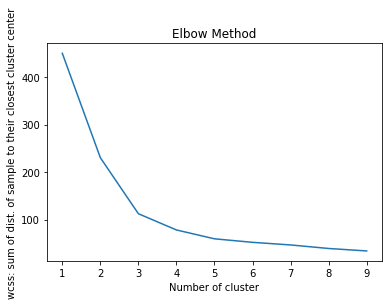

In [ ]:
plt.plot(range(1,10),wss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [ ]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(data_selected)
results=kmeans_1.predict(data_selected)
labels=kmeans_1.labels_
centers=kmeans_1.cluster_centers_

In [ ]:
df_features['cluster'] = results
df_features['scaled_R'] = scaled[:,:1]
df_features['scaled_F'] = scaled[:,1:2]
df_features['scaled_M'] = scaled[:,2:3]
df_features

,id_customer,recency,frequency,monetary,R_score,F_score,M_score,customer_activity,customer_value,cluster,scaled_R,scaled_F,scaled_M
0,1,0.006977,0.063492,0.028235,1,2,1,Active,Silver,0,-1.381354,-0.426391,-0.337201
1,2,0.067442,0.063492,0.002324,1,2,1,Active,Silver,0,-1.180028,-0.426391,-0.504265
2,3,0.058140,0.238095,0.521720,1,4,2,Active,Gold,3,-1.211001,0.697483,2.844566
3,4,0.039535,0.095238,0.042272,1,3,1,Active,Silver,0,-1.272948,-0.222050,-0.246699
4,5,0.041860,0.460317,0.242256,1,4,2,Active,Gold,3,-1.265204,2.127868,1.042704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0.688372,0.015873,0.000213,4,1,1,Churned,Silver,1,0.887434,-0.732902,-0.517880
146,147,0.606977,0.047619,0.034783,3,2,1,Churned,Silver,4,0.616419,-0.528561,-0.294982
147,148,0.758140,0.015873,0.001782,4,1,1,Churned,Silver,1,1.119733,-0.732902,-0.507763
148,149,0.709302,0.238095,0.077654,4,4,2,Churned,Gold,1,0.957124,0.697483,-0.018574


In [ ]:
df_RFM_saved = df_features[df_features['cluster']==4]

In [ ]:
df_RFM_saved.to_csv('df_RFM_cluster0.csv')

In [ ]:
# 3D Scatter Plot
px.scatter_3d(data_frame=df_features, x='scaled_R', y='scaled_F', z='scaled_M', color='cluster')

In [ ]:
df_RFM_group = df_features.groupby('cluster').agg({'scaled_R':'mean','scaled_F':'mean','scaled_M':'mean'}).reset_index()
df_RFM_group

,cluster,scaled_R,scaled_F,scaled_M
0,0,-1.144733,0.053572,-0.093651
1,1,0.943541,-0.498413,-0.366809
2,2,-1.389097,3.830707,5.004625
3,3,-1.269969,2.135727,1.439775
4,4,0.411479,-0.371900,-0.244287


In [ ]:
import plotly.graph_objects as go
clusters=df_RFM_group['cluster']

fig = go.Figure(data=[
    go.Bar(name='Recency', x=clusters, y=df_RFM_group['scaled_R']),
    go.Bar(name='Frequency', x=clusters, y=df_RFM_group['scaled_F']),
    go.Bar(name='Monetary', x=clusters, y=df_RFM_group['scaled_M']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# **F. Interpretasikan hasil segmentasi dalam bentuk visualisasi**

Hasil segmentasi diinterpretasikan dengan Tabel Kontigensi.
- Use the Recency segmentation to identify customers at risk of churn.
- Use the Frequency and Monetary segmentation to estimate customer value.


In [ ]:
# Hasil Interpretasi (Tabel Kontigensi)
df_customer_segment = pd.DataFrame(df_features.groupby(["R_score", "F_score", "M_score"])["id_customer"].count())
df_customer_segment

id_customer
R_score F_score M_score             
1       2       1                  4
        3       1                  6
                2                  4
        4       1                  6
                2                 15
                4                  3
2       1       1                  2
        2       1                 16
        3       1                  4
                2                  5
        4       1                  9
                2                  4
3       1       1                 10
        2       1                 15
        3       1                  4
                2                  2
        4       1                  2
4       1       1                 13
        2       1                 12
                2                  3
        3       1                  7
                2                  3
        4       2                  1

In [ ]:
df_customer_segment = df_customer_segment.reset_index()
df_customer_segment

,R_score,F_score,M_score,id_customer
0,1,2,1,4
1,1,3,1,6
2,1,3,2,4
3,1,4,1,6
4,1,4,2,15
5,1,4,4,3
6,2,1,1,2
7,2,2,1,16
8,2,3,1,4
9,2,3,2,5


In [ ]:
def get_customer_activity_label(R_score):
  if R_score == 1:
    return "Active"
  elif R_score == 2:
    return "At Risk"
  elif R_score >=3:
    return "Churned"

def get_customer_value_label(F_score, M_score):
  if F_score == 4 and M_score == 4:
    return "Premium"
  elif (F_score >= 2 and F_score <= 4) and (M_score >= 2 and M_score <= 4):
    return "Gold"
  else:
    return "Silver"

In [ ]:
df_features["customer_activity"] = df_features.apply(lambda x:get_customer_activity_label(x["R_score"]), axis=1)
df_features["customer_value"] = df_features.apply(lambda x:get_customer_value_label(x["F_score"], x["M_score"]), axis=1)

In [ ]:
import plotly.express as px
import plotly as pl

import plotly.express as px
px.treemap(df_features, path=["customer_activity", "customer_value" ])

In [ ]:
df_features.describe().round(4)

,id_customer,recency,frequency,monetary,R_score,F_score,M_score,cluster,scaled_R,scaled_F,scaled_M
count,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000,150.0000
mean,75.5000,0.4218,0.1297,0.0805,2.4867,2.6000,1.3067,1.5067,0.0000,-0.0000,0.0000
std,43.4454,0.3013,0.1559,0.1556,1.1336,1.0555,0.5787,1.4871,1.0034,1.0034,1.0034
min,1.0000,0.0023,0.0159,0.0002,1.0000,1.0000,1.0000,0.0000,-1.3968,-0.7329,-0.5179
25%,38.2500,0.0703,0.0317,0.0047,1.2500,2.0000,1.0000,0.0000,-1.1703,-0.6307,-0.4890
50%,75.5000,0.5791,0.0714,0.0288,2.0000,2.5000,1.0000,1.0000,0.5235,-0.3753,-0.3335
75%,112.7500,0.6767,0.1587,0.0744,4.0000,4.0000,2.0000,3.0000,0.8487,0.1866,-0.0397
max,150.0000,1.0000,1.0000,1.0000,4.0000,4.0000,4.0000,4.0000,1.9250,5.6017,5.9283


In [ ]:
# Visualisasi variabel
fig = make_subplots(rows=1, cols=3, subplot_titles=("Recency", "Frequency", "Monetary"))

fig.add_trace(go.Box(y=df_features["recency"], boxpoints="all"), row=1, col=1)
fig.add_trace(go.Box(y=df_features["frequency"], boxpoints="all"), row=1, col=2)
fig.add_trace(go.Box(y=df_features["monetary"], boxpoints="all"), row=1, col=3)

fig.update_layout(showlegend=False)
fig.show()